# Pratique de geopandas avec les données vélib

Lino Galiana  
2023-07-09

<p class="badges">

<a href="https://github.com/linogaliana/python-datascientist-notebooks/blob/main/notebooks/manipulation/03_geopandas_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
<a href="https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist-notebooks/blob/main/notebooks/manipulation/03_geopandas_TP.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter" alt="Download"></a>
<a href="https://nbviewer.jupyter.org/github/linogaliana/python-datascientist-notebooksblob/main/notebooks/manipulation/03_geopandas_TP.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter" alt="nbviewer"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-jupyter.sh%C2%BB&init.personalInitArgs=%C2%ABmanipulation%2003_geopandas_TP%C2%BB&security.allowlist.enabled=false" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSP%20Cloud-Tester_avec_Jupyter-orange?logo=Jupyter&logoColor=orange" alt="Onyxia"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/vscode-python?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-vscode.sh%C2%BB&init.personalInitArgs=%C2%ABmanipulation%2003_geopandas_TP%C2%BB&security.allowlist.enabled=false" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSP%20Cloud-Tester_avec_VSCode-blue?logo=visualstudiocode&logoColor=blue" alt="Onyxia"></a><br>
<a href="https://mybinder.org/v2/gh/linogaliana/python-datascientist-notebooks/main?filepath={binder_path}" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=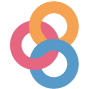" alt="Binder"></a>
<a href="https://colab.research.google.com/github/linogaliana/python-datascientist-notebooks/blob/main/notebooks/manipulation/03_geopandas_TP.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
<a href="https://github.dev/linogaliana/python-datascientist-notebooks/notebooks/manipulation/03_geopandas_TP.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=visualstudiocode&label=&message=Open%20in%20Visual%20Studio%20Code&labelColor=2c2c32&color=007acc&logoColor=007acc" alt="githubdev"></a>

</p>

</p>

Dans ce TP,
nous allons apprendre à importer et
manipuler des données spatiales avec
`Python`.

Ce langage propose
des fonctionnalités très intéressantes pour ce type de
données complexes qui le rendent capable de se comporter
comme un logiciel de SIG[1].
Grâce à la librairie [`Geopandas`](https://geopandas.org/en/stable/), une extension
de `Pandas` aux données spatiales, les
données géographiques pourront être manipulées
comme n’importe quel type de données avec `Python`.
La complexité induite par la dimension spatiale ne sera pas ressentie.

[1] D’ailleurs, le logiciel de cartographie spécialisé QGIS, s’appuie sur `Python`
pour les manipulations de données nécessaires avant de réaliser une carte.

<details>
<summary>

Illustration du principe des données spatiales (documentation de `sf`, l'équivalent de `Geopandas` en `R`)

</summary>

![](https://user-images.githubusercontent.com/520851/50280460-e35c1880-044c-11e9-9ed7-cc46754e49db.jpg){width="70%"}

</details>

Ce chapitre illustre à partir d’exemples pratiques certains principes centraux de l’analyse de données :

-   Manipulations sur les attributs des jeux de données ;
-   Manipulations géométriques ;
-   Gestion des projections cartographiques ;
-   Création rapide de cartes (ce sera approfondi dans un prochain chapitre).

Si vous êtes intéressés par `R`,
une version très proche de ce TP est disponible dans [ce cours de `R`](https://rgeo.linogaliana.fr/exercises/geospatial-wrangling.html).

<div class="alert alert-info" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #007bff80;">
<h3 class="alert-heading"><i class="fa fa-comment"></i> Note</h3>

Le package `cartiflette` est expérimental
et n’est disponible que sur
[`Github`](https://github.com/InseeFrLab/cartogether), pas sur `PyPi`.
Il est amené à évoluer rapidement et cette page sera mise à jour
quand de nouvelles fonctionalités (notamment l’utilisation d’`API`)
seront disponibles pour encore simplifier la récupération de
contours géographiques.

Pour installer `cartiflette`, il est nécessaire d’utiliser les commandes suivantes
depuis un `Jupyter Notebook` (si vous utilisez la ligne de commande directement,
vous pouvez retirer les `!` en début de ligne):

``` python
!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartiflette@80b8a5a28371feb6df31d55bcc2617948a5f9b1a
```

Ces commandes permettent de récupérer l’ensemble du code
source depuis [`Github`](https://github.com/InseeFrLab/cartiflette)

</div>

## Préliminaires

Avant de se lancer dans le TD, il est nécessaire d’installer quelques
librairies qui ne sont pas disponibles par défaut, dans l’environnement `Python`
de base de la *data science*. Pour installer celles-ci depuis une
cellule de *notebook* `Jupyter`, le code suivant est à exécuter :

In [3]:
!pip install pandas fiona shapely pyproj rtree # à faire obligatoirement en premier pour utiliser rtree ou pygeos pour les jointures spatiales
!pip install contextily
!pip install geopandas
!pip install pygeos
!pip install topojson

Après installations,
les *packages* à importer pour progresser
dans ce chapitre sont les suivants :

In [9]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

Les instructions d’installation du package `cartiflette`
sont quant à elles détaillées dans le chapitre
précédent.

In [5]:
!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartiflette@80b8a5a28371feb6df31d55bcc2617948a5f9b1a

In [2]:
from cartiflette.s3 import download_vectorfile_url_all

/opt/mamba/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.12.0-CAPI-1.18.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/opt/mamba/lib/python3.10/site-packages/cartiflette/utils/keep_subset_geopandas.py:5: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.re

## Lire et enrichir des données spatiales

Dans cette partie,
nous utiliserons
les fonds de carte de l’IGN dont
la mise à disposition est facilitée
par le projet [`cartiflette`](https://github.com/InseeFrLab/cartiflette.git)[1].

[1] La librairie `Python` est encore expérimentale mais
les prochaines semaines devraient permettre de combler ce manque.
Une documentation interactive illustrant le code nécessaire pour reproduire
telle ou telle carte est disponible sur [linogaliana.github.io/cartiflette-website](https://linogaliana.github.io/cartiflette-website/index.html).

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 1: découverte des objets géographiques</h3>

En premier lieu, on récupère des données géographiques grâce
au *package* `cartiflette`.

1.  Utiliser
    le code ci-dessous pour
    télécharger les données communales (produit `Admin Express` de l’IGN)
    des départements de la petite couronne (75, 92, 93 et 94)
    de manière simplifiée grâce au *package*
    `cartiflette`:

``` python
communes_borders = download_vectorfile_url_all(
    crs = 4326,
    values = ["75", "92", "93", "94"],
    borders="COMMUNE",
    vectorfile_format="topojson",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)
```

1.  Regarder les premières lignes des données. Identifier la différence avec
    un *dataframe* standard.

``` python
# 2) Regarder les premières lignes
communes_borders.head()
```

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>

|     | id                       | ID  | NOM              | NOM_M            | INSEE_COM | STATUT          | POPULATION | INSEE_CAN | INSEE_ARR | INSEE_DEP | INSEE_REG | SIREN_EPCI          | source                           | geometry                                          |
|-----|--------------------------|-----|------------------|------------------|-----------|-----------------|------------|-----------|-----------|-----------|-----------|---------------------|----------------------------------|---------------------------------------------------|
| 0   | COMMUNE_0000000009736048 | NaN | Paris            | PARIS            | 75056     | Capitale d'état | 2165423    | NR        | 1         | 75        | 11        | 200054781           | IGN:EXPRESS-COG-CARTO-TERRITOIRE | POLYGON ((2.36421 48.81640, 2.36333 48.81615, ... |
| 0   | COMMUNE_0000000009736037 | NaN | Levallois-Perret | LEVALLOIS-PERRET | 92044     | Commune simple  | 66082      | 16        | 2         | 92        | 11        | 200054781/200057982 | IGN:EXPRESS-COG-CARTO-TERRITOIRE | POLYGON ((2.28739 48.90364, 2.28846 48.90302, ... |
| 1   | COMMUNE_0000000009736055 | NaN | Bois-Colombes    | BOIS-COLOMBES    | 92009     | Commune simple  | 28841      | 11        | 2         | 92        | 11        | 200054781/200057990 | IGN:EXPRESS-COG-CARTO-TERRITOIRE | POLYGON ((2.26639 48.90629, 2.26645 48.90615, ... |
| 2   | COMMUNE_0000000009736538 | NaN | Malakoff         | MALAKOFF         | 92046     | Commune simple  | 30950      | 18        | 1         | 92        | 11        | 200054781/200057966 | IGN:EXPRESS-COG-CARTO-TERRITOIRE | POLYGON ((2.27818 48.81425, 2.28066 48.81469, ... |
| 3   | COMMUNE_0000000009736038 | NaN | Clichy           | CLICHY           | 92024     | Commune simple  | 63089      | 09        | 2         | 92        | 11        | 200054781/200057990 | IGN:EXPRESS-COG-CARTO-TERRITOIRE | POLYGON ((2.30377 48.89415, 2.30258 48.89487, ... |

</div>

1.  Afficher le `crs` de `communes_borders`. Ce dernier contrôle la
    transformation de l’espace tridimensionnel terrestre en une surface plane.
    Utiliser `to_crs` pour transformer les données en Lambert 93, le
    système officiel (code EPSG 2154).

2.  Afficher les communes des Hauts de Seine (département 92) et utiliser la méthode
    `plot`

3.  Ne conserver que Paris et réprésenter les frontières sur une carte : quel est le problème pour
    une analyse de Paris intramuros?

On remarque rapidement le problème.
On ne dispose ainsi pas des limites des arrondissements parisiens, ce
qui appauvrit grandement la carte de Paris.

1.  Cette fois, utiliser l’argument `borders="COMMUNE_ARRONDISSEMENT"` pour obtenir
    un fonds de carte consolidé des communes avec les arrondissements dans les grandes villes.
    Convertir en Lambert 93.

</div>

In [3]:
# 1. Chargement des données de Cartiflette
communes_borders = download_vectorfile_url_all(
    crs = 4326,
    values = ["75", "92", "93", "94"],
    borders="COMMUNE",
    vectorfile_format="topojson",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE/crs=4326/DEPARTEMENT=75/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 14.5kiB [00:00, 15.0MiB/s]
ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE/crs=4326/DEPARTEMENT=92/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 62.3kiB [00:00, 20.6MiB/s]

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE/crs=4326/DEPARTEMENT=93/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson



Downloading: : 119kiB [00:00, 27.6MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE/crs=4326/DEPARTEMENT=94/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 110kiB [00:00, 23.6MiB/s]


In [4]:
# 2. Regarder les premières lignes
communes_borders.head()
# Il y a une colonne geometry qui contient les informations nécessaires pour connaître les contours communaux

,id,ID,NOM,NOM_M,INSEE_COM,STATUT,POPULATION,INSEE_CAN,INSEE_ARR,INSEE_DEP,INSEE_REG,SIREN_EPCI,source,geometry
0,COMMUNE_0000000009736048,NaN,Paris,PARIS,75056,Capitale d'état,2165423,NR,1,75,11,200054781,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"POLYGON ((2.36421 48.81640, 2.36333 48.81615, ..."
0,COMMUNE_0000000009736037,NaN,Levallois-Perret,LEVALLOIS-PERRET,92044,Commune simple,66082,16,2,92,11,200054781/200057982,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"POLYGON ((2.28739 48.90364, 2.28846 48.90302, ..."
1,COMMUNE_0000000009736055,NaN,Bois-Colombes,BOIS-COLOMBES,92009,Commune simple,28841,11,2,92,11,200054781/200057990,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"POLYGON ((2.26639 48.90629, 2.26645 48.90615, ..."
2,COMMUNE_0000000009736538,NaN,Malakoff,MALAKOFF,92046,Commune simple,30950,18,1,92,11,200054781/200057966,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"POLYGON ((2.27818 48.81425, 2.28066 48.81469, ..."
3,COMMUNE_0000000009736038,NaN,Clichy,CLICHY,92024,Commune simple,63089,09,2,92,11,200054781/200057990,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"POLYGON ((2.30377 48.89415, 2.30258 48.89487, ..."


In [5]:
# 3) Afficher le crs
communes_borders.crs
# Les données sont en WGS84, on les reprojette en lambert 93

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

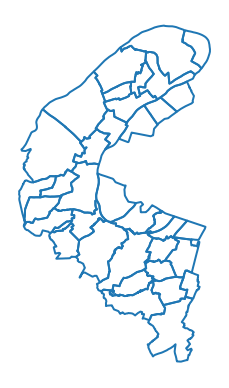

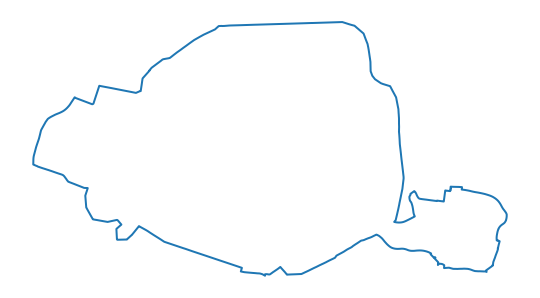

In [6]:
# 6. Chargement des données de Cartiflette
petite_couronne = download_vectorfile_url_all(
    crs = 4326,
    values = ["75", "92", "93", "94"],
    borders="COMMUNE_ARRONDISSEMENT",
    vectorfile_format="topojson",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)
    
petite_couronne.crs
petite_couronne = petite_couronne.to_crs(2154)
petite_couronne.crs

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=75/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 40.1kiB [00:00, 22.5MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=92/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 63.0kiB [00:00, 20.6MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=93/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 120kiB [00:00, 27.7MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=94/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 111kiB [00:00, 27.5MiB/s]


<Projected CRS: EPSG:2154>
Name: RGF93 v1 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica (France métropolitaine including Corsica).
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993 v1
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Le système de projection

Un concept central dans les logiciels de SIG est la notion de
**projection**. L’exercice précédent imposait parfois certaines projections
sans expliquer l’importance de ces choix. `Python`, comme
tout SIG, permet une gestion cohérente des projections.

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 2 : Les projections, représentations et approximations</h3>

Voici un code utilisant encore
`cartiflette`
pour récupérer les frontières françaises (découpées par région):

``` python
france = download_vectorfile_url_all(
      values = "metropole",
      crs = 4326,
      borders = "REGION",
      vectorfile_format="topojson",
      filter_by="FRANCE_ENTIERE",
      source="EXPRESS-COG-CARTO-TERRITOIRE",
      year=2022)
```

1.  S’amuser à représenter les limites de la France avec plusieurs projections:

-   Mercator WGS84 (EPSG: 4326)
-   Projection healpix (`+proj=healpix +lon_0=0 +a=1`)
-   Projection prévue pour Tahiti (EPSG: 3304)
-   Projection Albers prévue pour Etats-Unis (EPSG: 5070)

1.  Calculer la superficie en $km^2$
    des régions françaises dans les deux systèmes de projection suivants :
    World Mercator WGS84 (EPSG: 3395) et Lambert 93 (EPSG: 2154). Calculer la différence en $km^2$
    pour chaque région.

</div>

In [16]:
france = download_vectorfile_url_all(
      values = "metropole",
      crs = 4326,
      borders = "REGION",
      vectorfile_format="topojson",
      filter_by="FRANCE_ENTIERE",
      source="EXPRESS-COG-CARTO-TERRITOIRE",
      year=2022)

In [17]:
# Question 1 : Tester différentes projections
france_2154 = france.to_crs(2154)
france_healpix = france.to_crs("+proj=healpix +lon_0=0 +a=1")
france_5070 = france.to_crs(5070)
france_3304 = france.to_crs(3304)

Avec la question 1 illustrant quelques cas pathologiques,
on comprend que les projections ont un effet déformant
qui se voit bien lorsqu’on les représente côte à côte sous
forme de cartes :

``` python
ax1 = france_2154.boundary.plot(edgecolor = "k", linewidth=0.5)
ax2 = france_healpix.boundary.plot(edgecolor = "k", linewidth=0.5)
ax3 = france_5070.boundary.plot(edgecolor = "k", linewidth=0.5)
ax4 = france_3304.boundary.plot(edgecolor = "k", linewidth=0.5)

ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
ax4.set_axis_off()
```

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: center;"><div class="output display_data" width="50.0%" data-layout-align="center">
<p>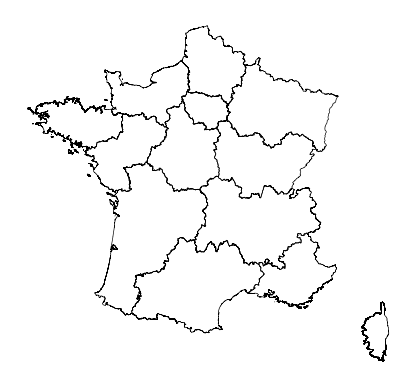</p>
</div></td>
<td style="text-align: center;"><div class="output display_data" width="50.0%" data-layout-align="center">
<p>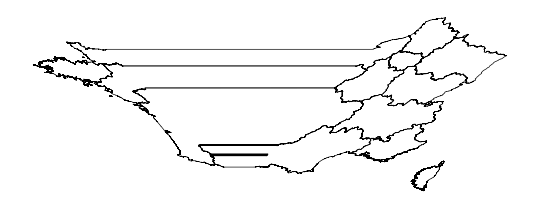</p>
</div></td>
</tr>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: center;"><div class="output display_data" width="50.0%" data-layout-align="center">
<p>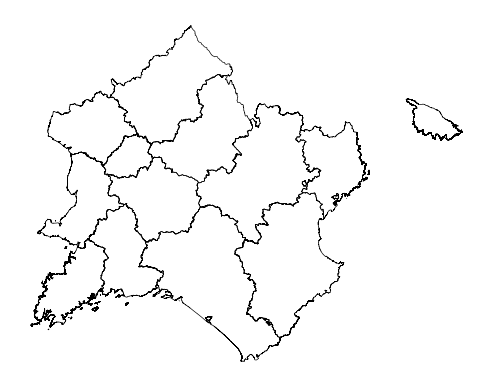</p>
</div></td>
<td style="text-align: center;"><div class="output display_data" width="50.0%" data-layout-align="center">
<p>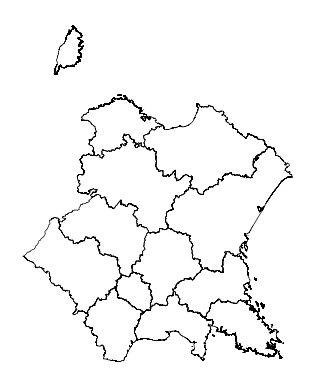</p>
</div></td>
</tr>
</tbody>
</table>

Figure 1: Comparaison des projections

In [19]:
# Question 2
france = france.to_crs(3395)
france["superficie_4326"] = france.area
france = france.to_crs(2154)
france["superficie_2154"] = france.area
france["mismatch"] = france['superficie_2154']-france['superficie_4326']

Cependant le problème n’est pas que visuel, il est également
numérique. Les calculs géométriques amènent à des différences
assez notables selon le système de référence utilisé.

On peut représenter ces approximations sur une carte[1] pour se faire
une idée des régions où l’erreur de mesure est la plus importante.

[1] Cette carte n’est pas trop soignée, c’est normal nous verrons comment
faire de belles cartes ultérieurement.

/opt/mamba/lib/python3.9/site-packages/geopandas/plotting.py:730: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


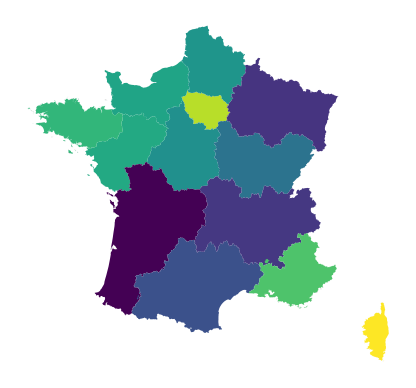

In [20]:
ax = france.plot(column = "mismatch")
ax.set_axis_off()

Ce type d’erreur de mesure est normal à l’échelle du territoire français.
Les projections héritères du Mercator déforment les distances,
surtout lorqu’on se rapproche de l’équateur ou des pôles.

![(a) Exemple de reprojection de pays depuis le site [thetruesize.com](https://www.thetruesize.com/)](https://pythonds.linogaliana.fr/content/manipulation/truesize.png)

![(b) “Don’t trust the Mercator projection” sur `Reddit`](https://rgeo.linogaliana.fr/exercises/img/mercator.jpg)

Figure 2: La projection Mercator, une vision déformante

Pour aller plus loin, la carte interactive
suivante, construite par Nicolas Lambert, issue de
ce [*notebook* `Observable`](https://observablehq.com/@neocartocnrs/impact-of-projections-on-areas), illustre l’effet
déformant de la projection Mercator, et de quelques unes autres,
sur notre perception de la taille des pays.

Il n’est donc pas suprenant que nos déformations soient exacerbées aux
extrèmes du territoire métropolitain.
Si les approximations sont légères sur de petits territoires,
les erreurs peuvent être
non négligeables à l’échelle de la France.

Il faut donc systématiquement
repasser les données dans le système de projection Lambert 93 (le
système officiel pour la métropole) avant d’effectuer des calculs géométriques.

## Utiliser des données géographiques comme des couches graphiques

Souvent, le découpage communal ne sert qu’en fond de cartes, pour donner des
repères. En complément de celui-ci, on peut désirer exploiter
un autre jeu de données.

On va partir des données de localisation des
stations velib,
disponibles [sur le site d’open data de la ville de Paris](https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/table/) et
requêtables directement en utilisant un URL

In [11]:
url = "https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/download/?format=geojson&timezone=Europe/Berlin&lang=fr"

Dans le prochain exercice, nous proposons de créer rapidement une
carte comprenant trois couches :

-   Les localisations de stations sous forme de points ;
-   Les bordures des communes et arrondissements pour contextualiser ;
-   Les bordures des départements en traits plus larges pour contextualiser également.

Nous irons plus loin dans le travail cartographique dans le prochain
chapitre. Mais être en mesure de positionner rapidement
ses données sur une carte est
toujours utile dans un travail exploratoire.

En amont de l’exercice,
utiliser la fonction suivante du *package* `cartiflette` pour récupérer
le fonds de carte des départements de la petite couronne:

In [7]:
idf = download_vectorfile_url_all(
      values = "11",
      crs = 4326,
      borders = "DEPARTEMENT",
      vectorfile_format="topojson",
      filter_by="REGION",
      source="EXPRESS-COG-CARTO-TERRITOIRE",
      year=2022)

petite_couronne_departements = idf.loc[idf['INSEE_DEP'].isin(["75","92","93","94"])].to_crs(2154)

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=DEPARTEMENT/crs=4326/REGION=11/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 316kiB [00:00, 41.1MiB/s]


<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 3: importer et explorer les données velib</h3>

On commence par récupérer les données nécessaires à la production
de cette carte.

1.  En utilisant l’URL précédent, importer les données velib sous le nom `station`
2.  Vérifier la projection géographique de `station` (attribut `crs`). Si celle-ci est différente des données communales, reprojeter ces
    dernières dans le même système de projection que les stations de vélib
3.  Ne conserver que les 50 principales stations (variable `capacity`)

On peut maintenant construire la carte de manière séquentielle avec la méthode `plot` en s’aidant de [cette documentation](https://geopandas.org/en/stable/docs/user_guide/mapping.html#maps-with-layers)

1.  En premier lieu, grâce à `boundary.plot`,
    représenter la couche de base des limites des communes et arrondissements:

    -   Utiliser les options `edgecolor = "black"` et `linewidth = 0.5`
    -   Nommer cet objet `base`

2.  Ajouter la couche des départements avec les options `edgecolor = "blue"` et `linewidth = 0.7`

3.  Ajouter les positions des stations
    et ajuster la taille en fonction de la variable `capacity`. L’esthétique des points obtenus peut être contrôlé grâce aux options `color = "red"` et `alpha = 0.4`.

4.  Retirer les axes et ajouter un titre avec les options ci-dessous:

``` python
base.set_axis_off()
base.set_title("Les 50 principales stations de Vélib")
```

</div>

In [13]:
# 1. Importer les données velib
stations = gpd.read_file(url)
stations.head()

,capacity,name,stationcode,geometry
0,23,Artois - Berri,8103,POINT (2.30643 48.87394)
1,25,Félix Ziem - Armand Gauthier,18111,POINT (2.33339 48.88950)
2,14,Boudreau - Auber,9106,POINT (2.32942 48.87219)
3,48,Pereire - Ternes,17040,POINT (2.28801 48.87974)
4,40,Institut du Monde Arabe - Saint-Germain,5020,POINT (2.35581 48.84906)


In [14]:
# 2. Reprojection
stations.crs
#stations = stations.to_crs(petite_couronne.crs) 

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
# 3. Principales stations
principales_stations = stations.sort_values("capacity", ascending = False).head(50)

La couche de base obtenue à l’issue de la question 4.

<Axes: >

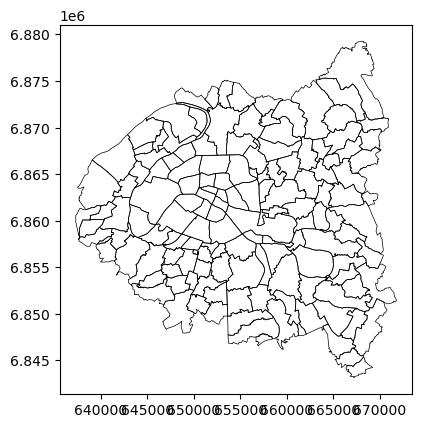

In [15]:
# 4. petite couronne
base = petite_couronne.boundary.plot(edgecolor = "black", linewidth = 0.5)
base

Puis en y ajoutant les limites départementales (question 5).

<Axes: >

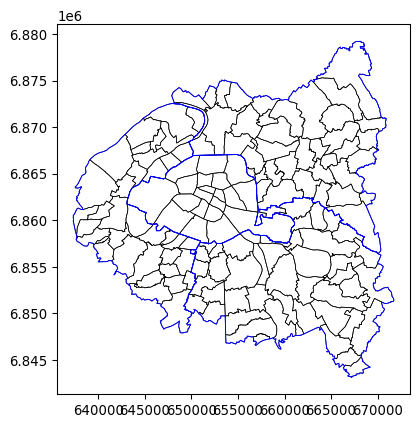

In [27]:
# 5. Ajout de la couche des départements
base = petite_couronne.boundary.plot(edgecolor = "black", linewidth = 0.5)
petite_couronne_departements.boundary.plot(ax = base, edgecolor = "blue", linewidth = 0.7)
base

Puis les stations (question 6).

<Axes: >

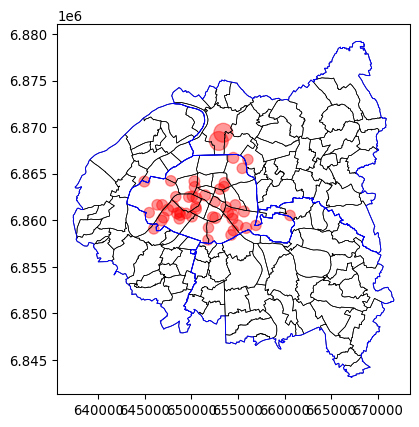

In [28]:
# 6. Ajout des stations
base = petite_couronne.boundary.plot(edgecolor = "black", linewidth = 0.5)
petite_couronne_departements.boundary.plot(ax = base, edgecolor = "blue", linewidth = 0.7)
principales_stations.plot(ax= base, markersize = "capacity", color = "red", alpha = 0.4)
base

La carte finale, après mise en forme:

<Axes: title={'center': 'Les 50 principales stations de Vélib'}>

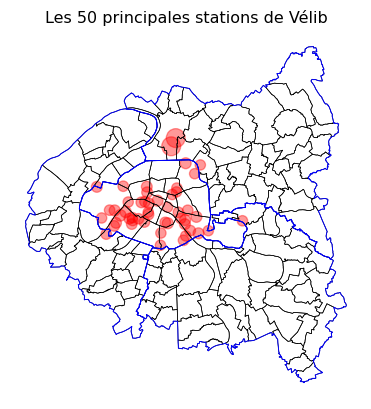

In [29]:
#7. sans axe et avec titre
base = petite_couronne.boundary.plot(edgecolor = "black", linewidth = 0.5)
petite_couronne_departements.boundary.plot(ax = base, edgecolor = "blue", linewidth = 0.7)
principales_stations.plot(ax= base, markersize = "capacity", color = "red", alpha = 0.4)
base.set_axis_off()
base.set_title("Les 50 principales stations de Vélib")
base

## Jointures spatiales

Les jointures attributaires fonctionnent comme avec un `Pandas` classique.
Pour conserver un objet spatial *in fine*, il faut faire attention à utiliser en premier (base de gauche) l’objet `Geopandas`.
En revanche, l’un des intérêts des objets `Geopandas` est qu’on peut également faire une jointure sur la dimension spatiale grâce à plusieurs fonctions.

La documentation à laquelle se référer est [ici](https://geopandas.org/mergingdata.html#spatial-joins).
Une version pédagogique pour `R` se trouve dans la documentation [`utilitR`](https://www.book.utilitr.org/03_fiches_thematiques/fiche_donnees_spatiales#joindre-des-donn%C3%A9es-g%C3%A9ographiques-et-attributaires).

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 4: Associer les stations aux communes et arrondissements auxquels elles appartiennent</h3>

Dans cet exercice, on va supposer que :

-   les localisations des stations `velib`
    sont stockées dans un *dataframe* nommé `stations`
-   les données administratives
    sont dans un *dataframe* nommé `petite_couronne`.

1.  Faire une jointure spatiale pour enrichir les données de stations en y ajoutant des informations de `petite_couronne`. Appeler cet objet `stations_info`.
2.  Créer les objets `stations_19e` et `arrondissement_19e` pour stocker, respectivement,
    les stations appartenant au 19e et les limites de l’arrondissement.
3.  Représenter la carte des stations du 19e arrondissement avec le code suivant :

``` python
base = petite_couronne.loc[petite_couronne['INSEE_DEP']=="75"].boundary.plot(edgecolor = "k", linewidth=0.5)
arrondissement_19e.boundary.plot(ax = base, edgecolor = "red", linewidth=0.9)
stations_19.plot(ax = base, color = "red", alpha = 0.4)
base.set_axis_off()
base.set_title("Les stations Vélib du 19e arrondissement")
base
```

1.  Compter le nombre de stations velib et le nombre de places velib par arrondissement ou commune. Représenter sur une carte chacune des informations
2.  Représenter les mêmes informations mais en densité (diviser par la surface de l’arrondissement ou commune en km2)

</div>

In [18]:
stations.head()

,capacity,name,stationcode,geometry
0,23,Artois - Berri,8103,POINT (2.30643 48.87394)
1,25,Félix Ziem - Armand Gauthier,18111,POINT (2.33339 48.88950)
2,14,Boudreau - Auber,9106,POINT (2.32942 48.87219)
3,48,Pereire - Ternes,17040,POINT (2.28801 48.87974)
4,40,Institut du Monde Arabe - Saint-Germain,5020,POINT (2.35581 48.84906)


In [17]:
petite_couronne.head()

,id,ID,NOM,NOM_M,INSEE_COM,STATUT,POPULATION,INSEE_CAN,INSEE_ARR,INSEE_DEP,INSEE_REG,SIREN_EPCI,source,INSEE_COG,geometry
0,ARR_MUNI0000000009736045,NaN,Paris 3e Arrondissement,PARIS 3E ARRONDISSEMENT,75056,Capitale d'état,34025,NR,1,75,11,200054781,IGN:EXPRESS-COG-CARTO-TERRITOIRE,75103,"POLYGON ((652324.622 6862635.302, 652326.463 6..."
1,ARR_MUNI0000000009736046,NaN,Paris 2e Arrondissement,PARIS 2E ARRONDISSEMENT,75056,Capitale d'état,21595,NR,1,75,11,200054781,IGN:EXPRESS-COG-CARTO-TERRITOIRE,75102,"POLYGON ((652167.724 6863604.342, 652193.783 6..."
2,ARR_MUNI0000000009736545,NaN,Paris 4e Arrondissement,PARIS 4E ARRONDISSEMENT,75056,Capitale d'état,29131,NR,1,75,11,200054781,IGN:EXPRESS-COG-CARTO-TERRITOIRE,75104,"POLYGON ((653663.658 6861937.170, 653680.442 6..."
3,ARR_MUNI0000000009736544,NaN,Paris 5e Arrondissement,PARIS 5E ARRONDISSEMENT,75056,Capitale d'état,58227,NR,1,75,11,200054781,IGN:EXPRESS-COG-CARTO-TERRITOIRE,75105,"POLYGON ((651312.816 6860162.422, 651317.730 6..."
4,ARR_MUNI0000000009736543,NaN,Paris 6e Arrondissement,PARIS 6E ARRONDISSEMENT,75056,Capitale d'état,40303,NR,1,75,11,200054781,IGN:EXPRESS-COG-CARTO-TERRITOIRE,75106,"POLYGON ((651056.714 6862351.152, 651091.406 6..."


In [30]:
#1.  Jointure spatiale entre stations et data_paris

stations_info = gpd.sjoin(stations, petite_couronne, predicate = 'within')

In [31]:
#2. 19e arrondissement
stations_19 = stations_info.loc[stations_info['NOM'].str.contains("19e")]
arrondissement_19e = petite_couronne.loc[petite_couronne['NOM'].str.contains("19e")]

<Axes: title={'center': 'Les stations Vélib du 19e arrondissement'}>

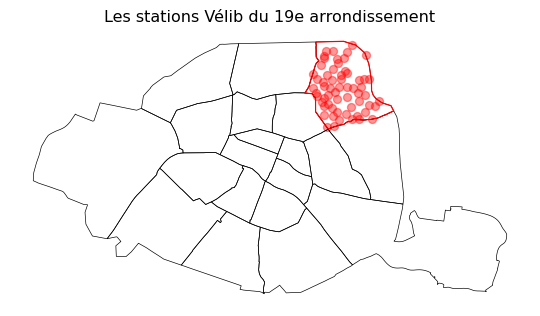

In [32]:
# 3. Carto du 19e 
base = petite_couronne.loc[petite_couronne['INSEE_DEP']=="75"].boundary.plot(edgecolor = "k", linewidth=0.5)
arrondissement_19e.boundary.plot(ax = base, edgecolor = "red", linewidth=0.9)
stations_19.plot(ax = base, color = "red", alpha = 0.4)
base.set_axis_off()
base.set_title("Les stations Vélib du 19e arrondissement")
base

Carte obtenue à la question 4 :

/opt/mamba/lib/python3.9/site-packages/geopandas/plotting.py:730: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


<Axes: >

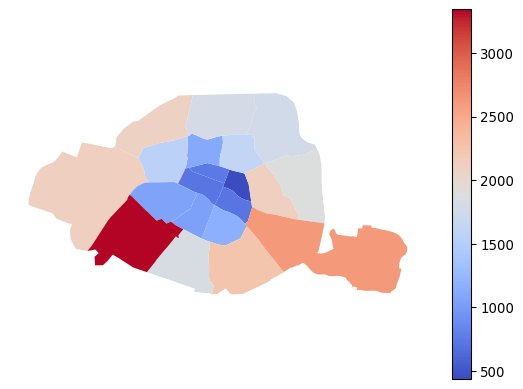

In [33]:
#4. Calcul et carte des capacity
stations_agg = (
  stations_info
  .groupby("INSEE_COG")
  .agg({"stationcode": "nunique", "capacity": "sum"})
  .reset_index()
)

petite_couronne_count = petite_couronne.merge(
  stations_agg
).to_crs(2154)

petite_couronne_count = petite_couronne_count.loc[petite_couronne_count["INSEE_DEP"]== "75"]
aplat = petite_couronne_count.plot(
    column = "capacity", cmap="coolwarm", legend=True)
aplat.set_axis_off()
aplat

Avec la carte de la question 4, basée sur des aplats de couleurs (choropleth map), le lecteur est victime d’une illusion classique. Les arrondissements les plus visibles sur la carte sont les plus grands. D’ailleurs c’est assez logique qu’ils soient également mieux pourvus en velib. Même si l’offre de velib est probablement plus reliée à la densité de population et d’équipements, on peut penser que l’effet taille joue et qu’ainsi on est victime d’une illusion avec la carte précédente.

Si on représente plutôt la capacité sous forme de densité, pour tenir compte de la taille différente des arrondissements, les conclusions sont inversées et correspondent mieux aux attentes d’un modèle centre-périphérie. Les arrondissements centraux sont mieux pourvus, cela se voit encore mieux avec des ronds proportionnels plutôt qu’une carte chorolèpthe.

/opt/mamba/lib/python3.9/site-packages/geopandas/plotting.py:730: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


<Axes: >

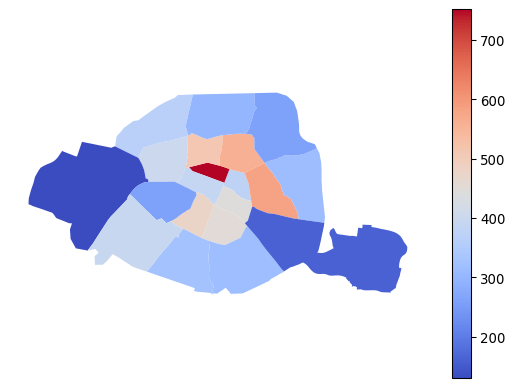

In [34]:
#5. Calcul et carte des area et density
petite_couronne_count['area'] = petite_couronne_count.area
petite_couronne_count['area'] = petite_couronne_count['area'].div(1e6)
petite_couronne_count['density'] = petite_couronne_count['capacity']/petite_couronne_count['area']

aplat = petite_couronne_count.plot(
    column = "density", cmap="coolwarm", legend=True)
aplat.set_axis_off()
aplat

## Exercice supplémentaire

Les exercices précédents ont permis de se familiariser au traitement de données
spatiales. Néanmoins il arrive de devoir jongler plus avec la
dimension géométrique par exemple pour changer d’échelle ou introduire
des fusions/dissolutions de géométries.

Imaginons que chaque utilisateur de velib se déplace exclusivement
vers la station la plus proche (à supposer qu’il n’y a jamais pénurie
ou surcapacité). Quelle est la carte de la couverture des vélibs ?
Pour répondre à ce type de question, on utilise fréquemment la
la [tesselation de Voronoï](https://fr.wikipedia.org/wiki/Diagramme_de_Vorono%C3%AF),
une opération classique pour transformer des points en polygones. L’exercice suivant
permet de se familiariser avec cette approche[1].

**Exercice à venir**

[1] Dans [ce document de travail](https://www.insee.fr/en/statistiques/4925202) sur données de téléphonie mobile, on montre néanmoins que cette approche n’est pas sans biais
sur des phénomènes où l’hypothèse de proximité spatiale est
trop simplificatrice.